In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("train_and_test.csv")
data

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [5]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [6]:
data = data.loc[:, (data != 0).any()]
missing_data = data.isnull().sum()
missing_data

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

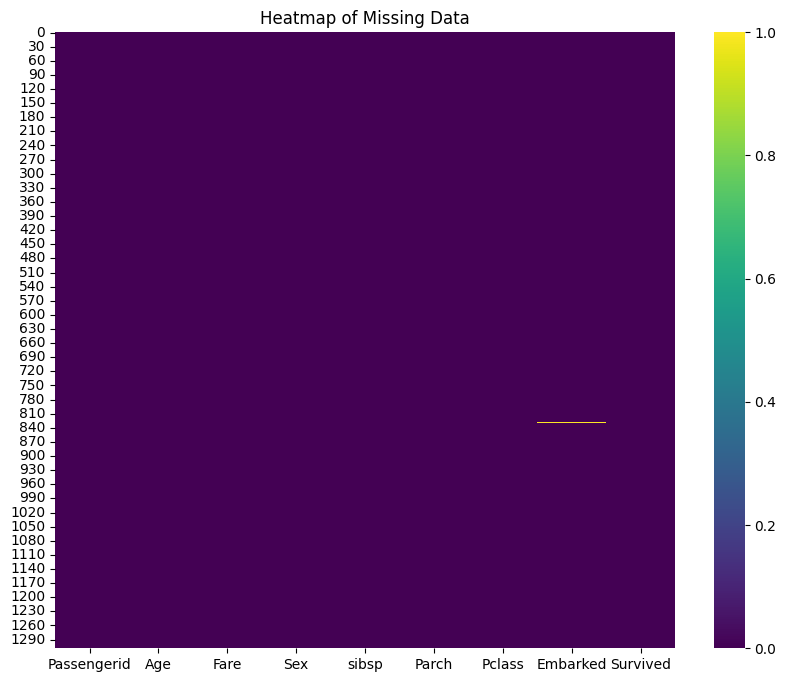

In [7]:
## Create a heatmap of missing data
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

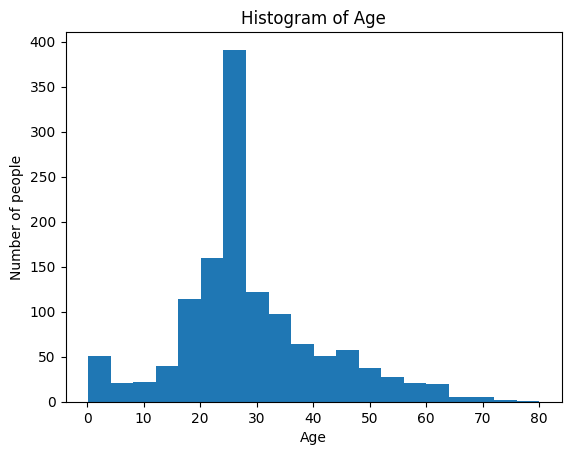

In [8]:
# Create the histogram
plt.hist(data["Age"], bins=20)

# Add labels and title
plt.xlabel("Age")
plt.ylabel('Number of people')
plt.title(f'Histogram of {"Age"}')

# Show the histogram
plt.show()

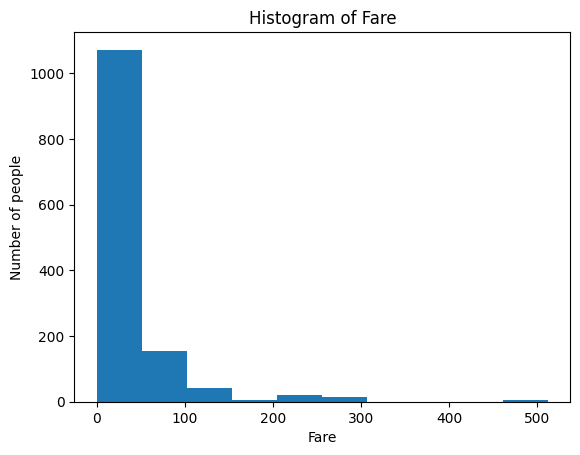

In [9]:
# Create the histogram
plt.hist(data["Fare"], bins=10)

# Add labels and title
plt.xlabel("Fare")
plt.ylabel('Number of people')
plt.title(f'Histogram of {"Fare"}')

# Show the histogram
plt.show()

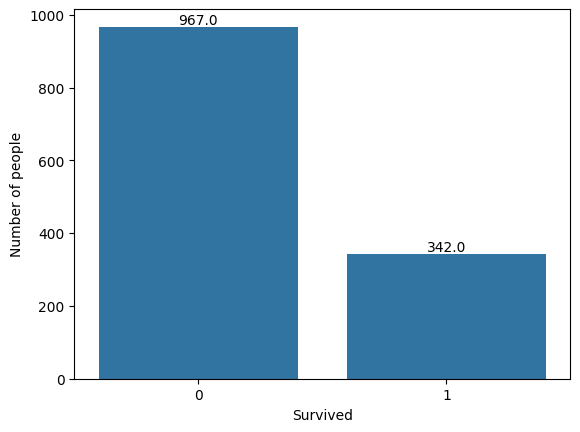

In [ ]:
#CountPlot for the Survived

ax = sns.countplot(x='Survived', data=data)
plt.xlabel("Survived")
plt.ylabel('Number of people')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

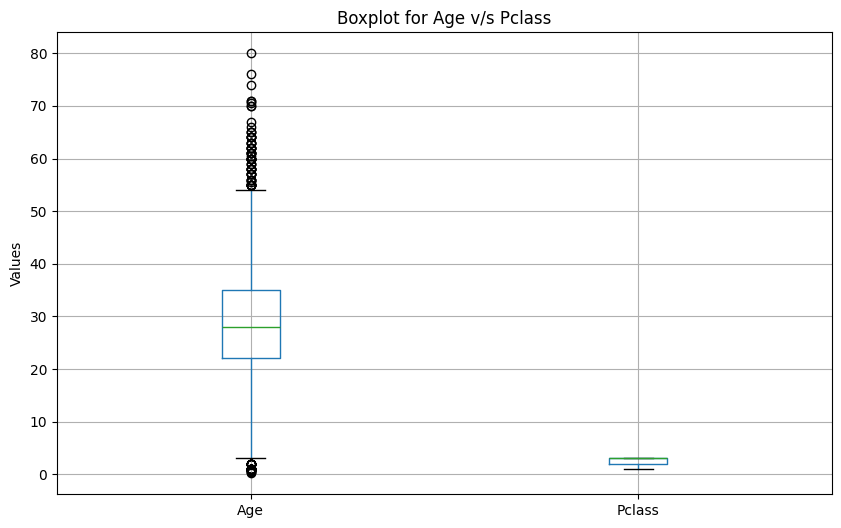

In [11]:
#BoxPlot for Age vs Pclass

plt.figure(figsize=(10, 6))
#plt.boxplot(data['Age']) # --- This plots only the 'Age' column of the data
#data.boxplot() # This plots all the columns of the data
data[["Age","Pclass"]].boxplot() # This plots select columns in box plot only ------------ remember to put 2x [square_brackets]
plt.title('Boxplot for Age v/s Pclass')
plt.ylabel('Values')
plt.show()

In [12]:
# DAY 2

In [13]:
columns_with_missing = data.columns[data.isnull().any()].tolist()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data)
print("Columns with missing values- ", columns_with_missing)

Columns with missing values-  ['Embarked']


In [14]:
# Used to fill the missing values with mean of the column

# Separate numeric and non-numeric columns
numeric_cols = data[columns_with_missing].select_dtypes(include=['number']).columns
non_numeric_cols = data[columns_with_missing].select_dtypes(exclude=['number']).columns

# Impute numeric columns with mean
if not numeric_cols.empty:
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Impute non-numeric columns with the most frequent value
if not non_numeric_cols.empty:
    imputer_non_numeric = SimpleImputer(strategy='most_frequent')
    data[non_numeric_cols] = imputer_non_numeric.fit_transform(data[non_numeric_cols])

data

C:\Users\User\AppData\Local\Temp\ipykernel_13264\2916396027.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_cols] = imputer.fit_transform(data[numeric_cols])


,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


In [15]:
# Splitting the data for train and test.
X = data.drop('Survived', axis=1)
y = data['Survived']  # Target Column should be serperated

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 1047
Testing set size: 262


In [17]:
# LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Predicting the model on test dataset
y_pred = model.predict(X_test)

In [19]:
# Confusion matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[187  10]
 [ 26  39]]
Accuracy: 0.8625954198473282


In [20]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model, X_test, y_test, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8490566  0.81132075 0.82692308 0.84615385 0.75      ]
Average CV Score:  0.8166908563134978
Number of CV Scores used in Average:  5


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

In [21]:
# DAY 3

In [22]:
from sklearn.svm import SVC
data = pd.read_csv("train_and_test.csv")

In [23]:
columns_with_missing = data.columns[data.isnull().any()].tolist()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data)
print("Columns with missing values- ", columns_with_missing)

Columns with missing values-  ['Embarked']


In [24]:
# Used to delete the row which contains null values
'''
data = data.dropna()
'''
#Run only if there are missing columns in the dataset
if(columns_with_missing != []):
    data[columns_with_missing] = imputer.fit_transform(data[columns_with_missing])
data

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [25]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [27]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model_svc = SVC(kernel='linear') # You can choose different kernels like 'rbf', 'poly', etc.
model_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred = model_svc.predict(X_test)

In [30]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model_svc, X_test, y_test, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.86792453 0.8490566  0.82692308 0.82692308 0.76923077]
Average CV Score:  0.8280116110304789
Number of CV Scores used in Average:  5
